In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc

  Using cached qiskit-1.2.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00


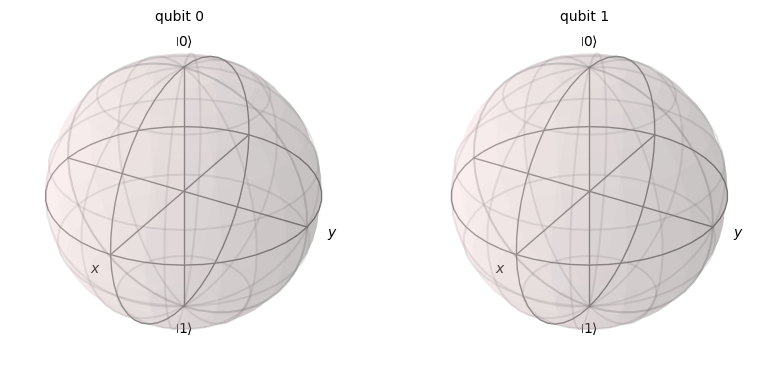

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
state = Statevector.from_instruction(qc)
state.draw('bloch')

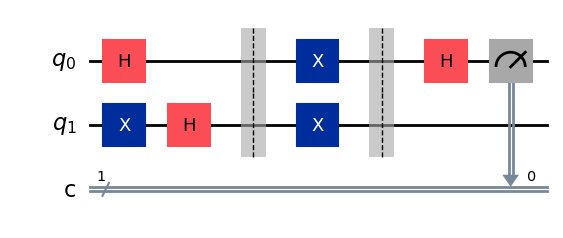

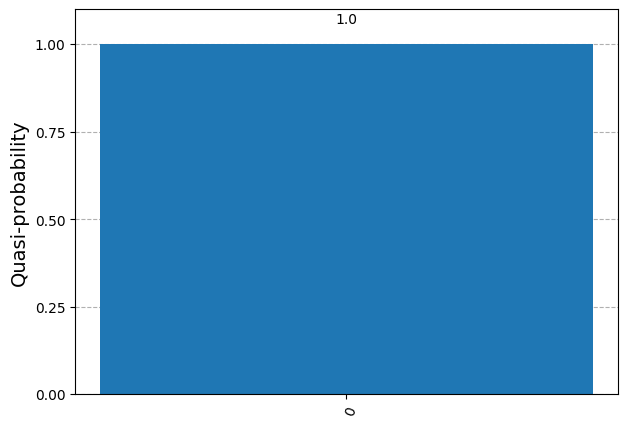

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_distribution

simulator_basic = BasicSimulator()

qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h(range(2))
qc.barrier(range(2))

#Function
#qc.cx(0, 1) #Balenced
qc.x(range(2)) #Constant
qc.barrier(range(2))

qc.h(0)
qc.measure(0, 0)
display(qc.draw('mpl'))
result = simulator_basic.run(qc, shots=1024).result()
counts = result.get_counts()
plot_distribution(counts)

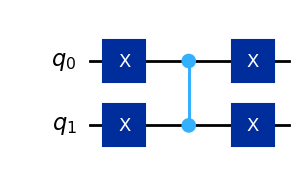

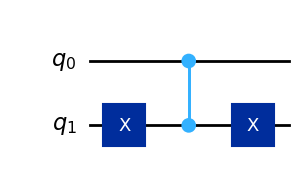

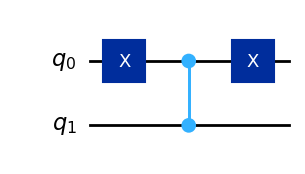

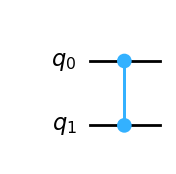

In [ ]:
oracle = []
for i in range(4):
  oracle_t = QuantumCircuit(2, name='oracle')
  if i==0:
    oracle_t.x(range(2))
    oracle_t.cz(0, 1)
    oracle_t.x(range(2))
  elif i==1:
    oracle_t.x(1)
    oracle_t.cz(0, 1)
    oracle_t.x(1)
  elif i==2:
    oracle_t.x(0)
    oracle_t.cz(0, 1)
    oracle_t.x(0)
  else:
    oracle_t.cz(0, 1)
  oracle_t.to_gate()
  display(oracle_t.draw('mpl'))
  oracle.append(oracle_t)

In [ ]:
from qiskit.visualization import plot_state_qsphere
import matplotlib.pyplot as plt

def visualization(quantum_circuit):
  state = Statevector.from_instruction(quantum_circuit)
  display(state.draw('latex'))
  display(quantum_circuit.draw('mpl'))
  display(plot_state_qsphere(state))
  probs = state.probabilities()
  x_label = state.sample_counts(shots=1000).keys()
  plt.figure()
  plt.bar(x_label, probs)
  plt.show()

<IPython.core.display.Latex object>

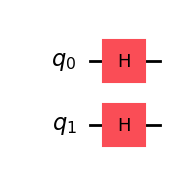

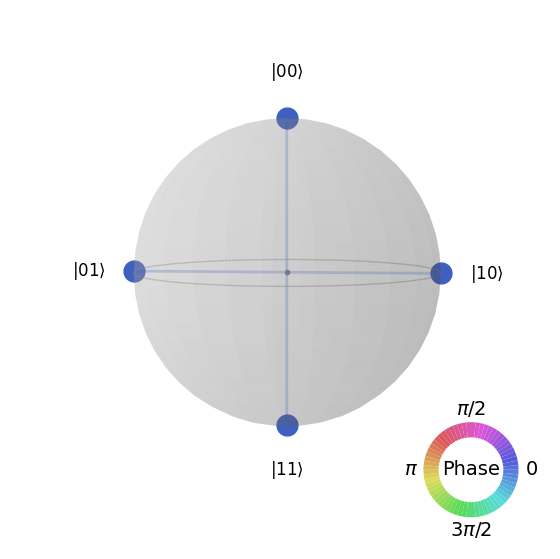

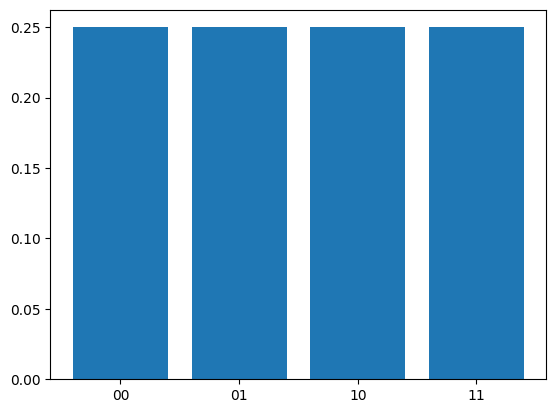

In [ ]:
grover = QuantumCircuit(2)
grover.h(range(2))
visualization(grover)

<IPython.core.display.Latex object>

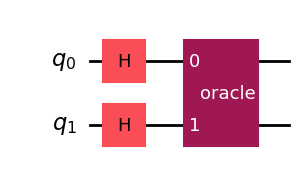

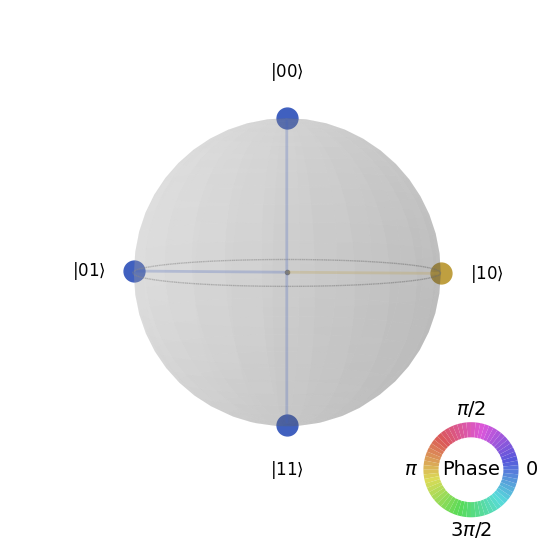

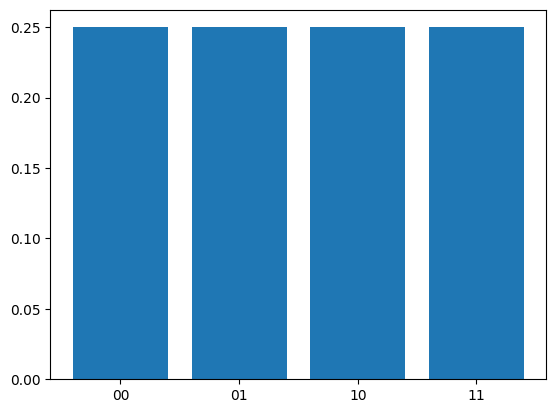

In [ ]:
grover.append(oracle[2], range(2))
visualization(grover)

# Detailed

<IPython.core.display.Latex object>

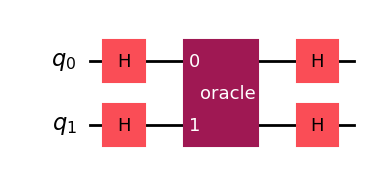

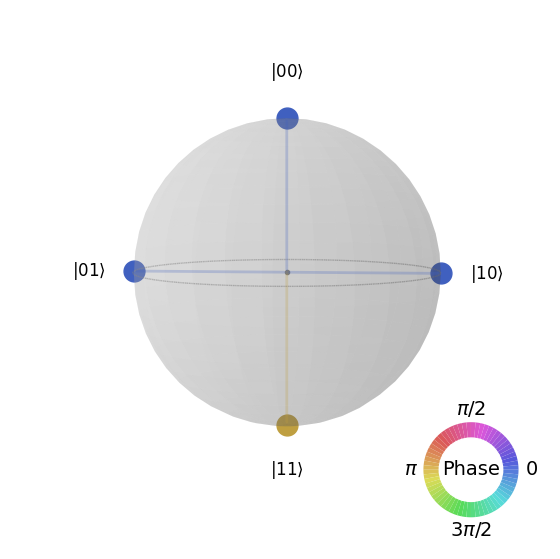

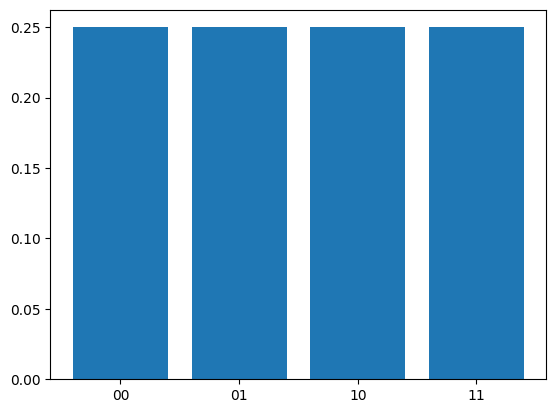

In [ ]:
qc = grover.copy()
qc.h(range(2))
visualization(qc)

<IPython.core.display.Latex object>

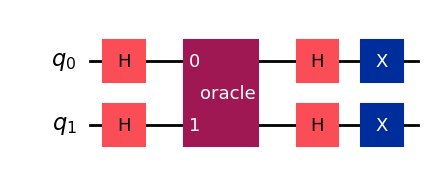

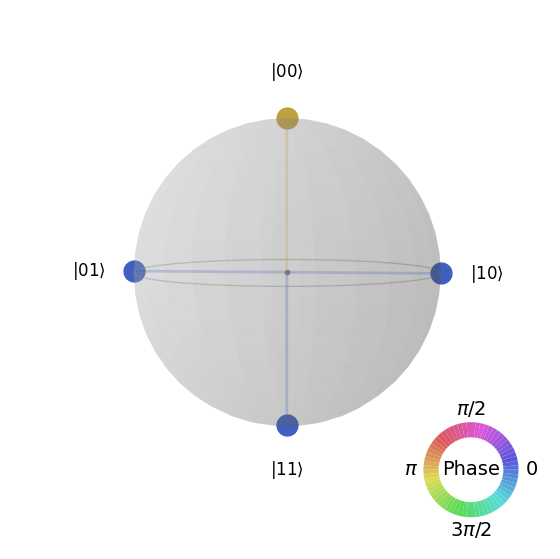

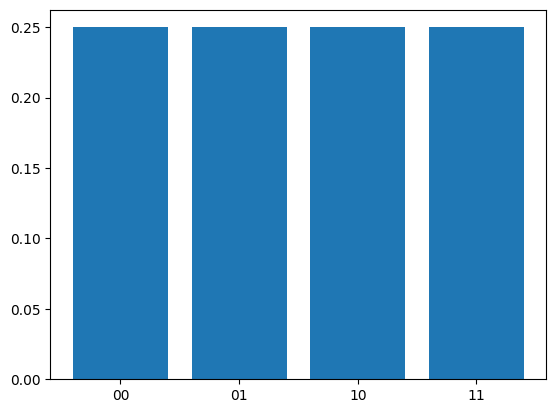

In [ ]:
qc.x(range(2))
visualization(qc)

<IPython.core.display.Latex object>

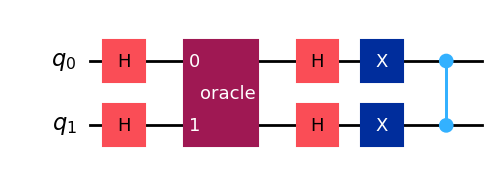

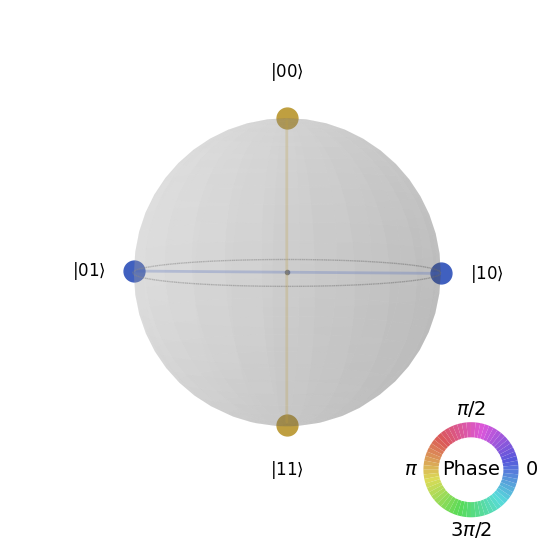

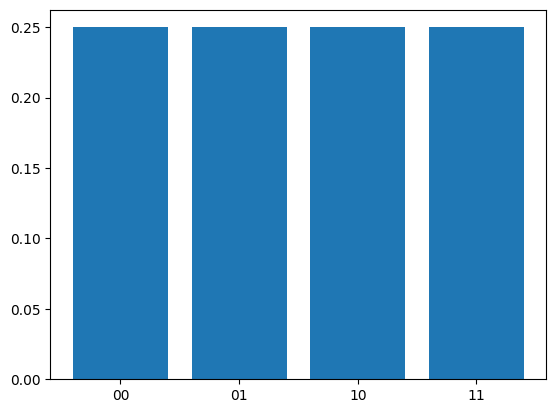

In [ ]:
qc.cz(0, 1)
visualization(qc)

<IPython.core.display.Latex object>

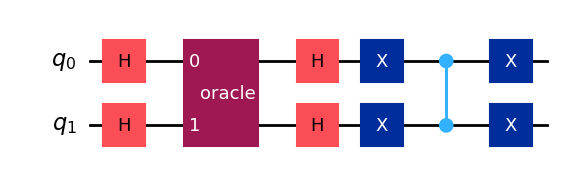

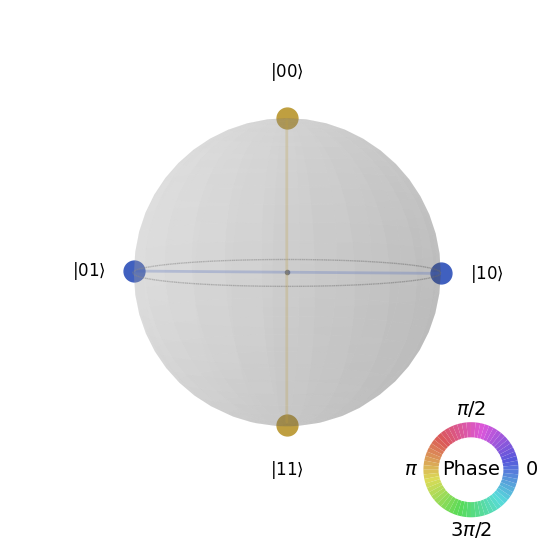

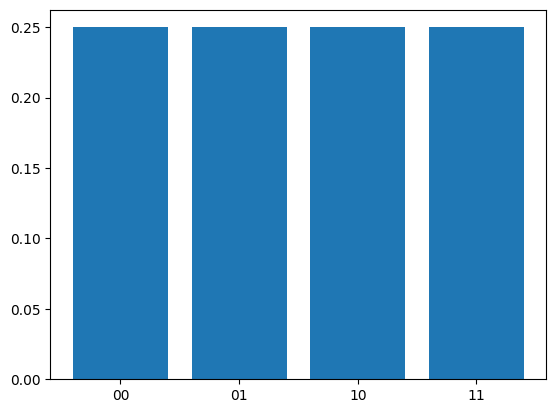

In [ ]:
qc.x(range(2))
visualization(qc)

<IPython.core.display.Latex object>

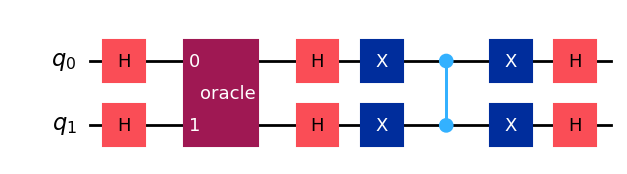

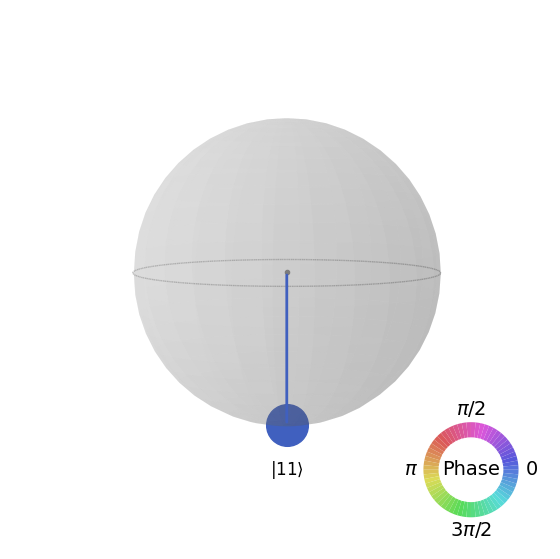

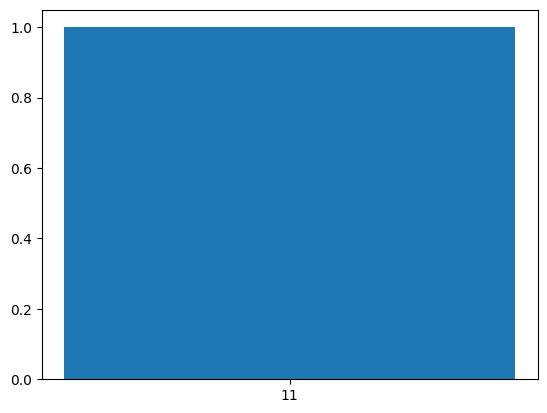

In [ ]:
qc.h(range(2))
visualization(qc)

# Continue

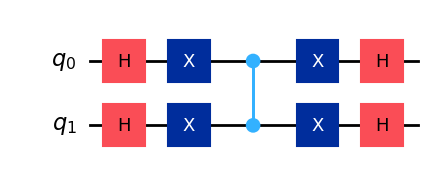

In [ ]:
reflection = QuantumCircuit(2, name='diffuser')
reflection.h(range(2))
reflection.x(range(2))
reflection.cz(0, 1)
reflection.x(range(2))
reflection.h(range(2))
reflection.to_gate()
reflection.draw('mpl')

<IPython.core.display.Latex object>

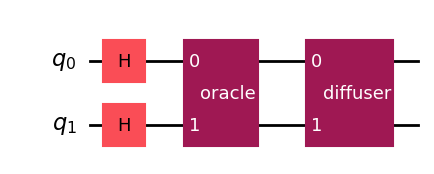

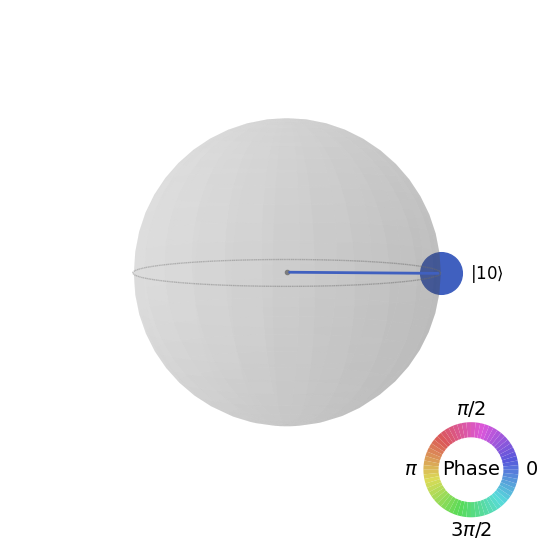

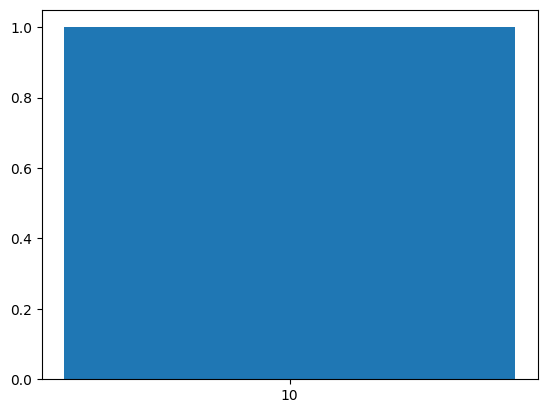

In [ ]:
grover.append(reflection, range(2))
visualization(grover)

<IPython.core.display.Latex object>

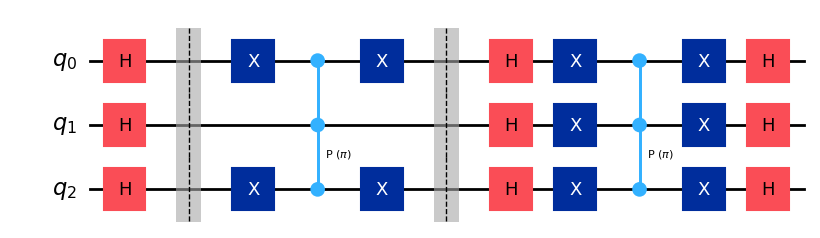

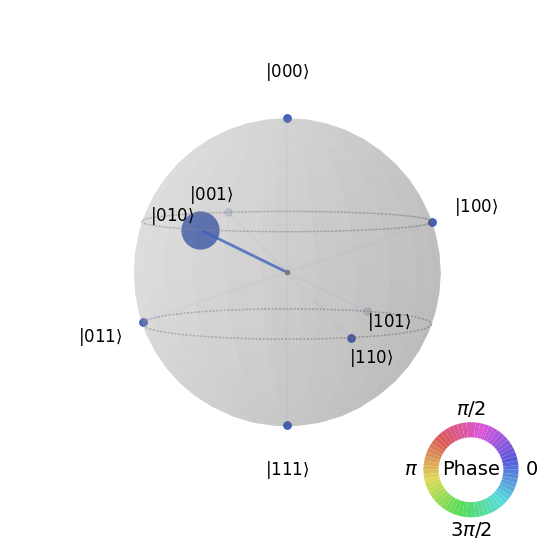

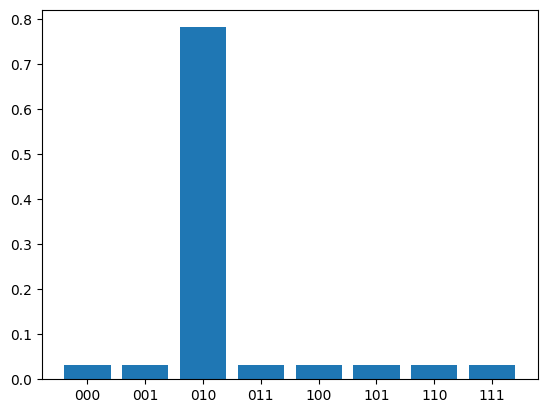

In [ ]:
from math import pi

qc = QuantumCircuit(3)
qc.h(range(3))
qc.barrier(range(3))
qc.x([0, 2])
qc.mcp(pi, list(range(2)), 2)
qc.x([0, 2])
qc.barrier(range(3))
qc.h(range(3))
qc.x(range(3))
qc.mcp(pi, list(range(2)), 2)
qc.x(range(3))
qc.h(range(3))
visualization(qc)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

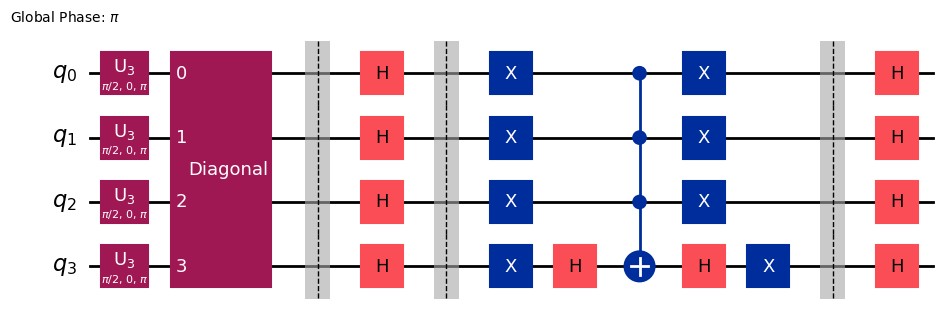

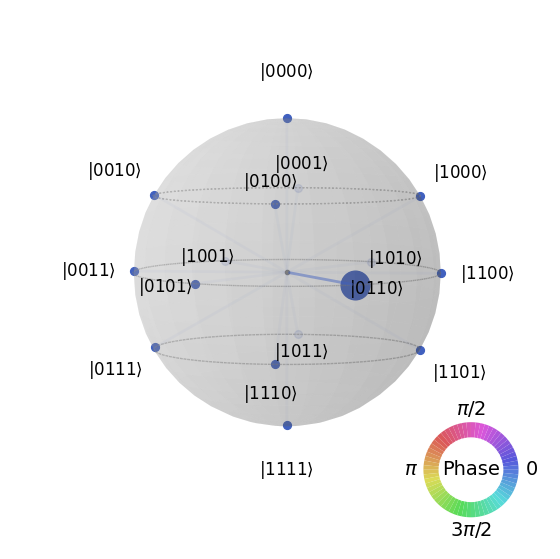

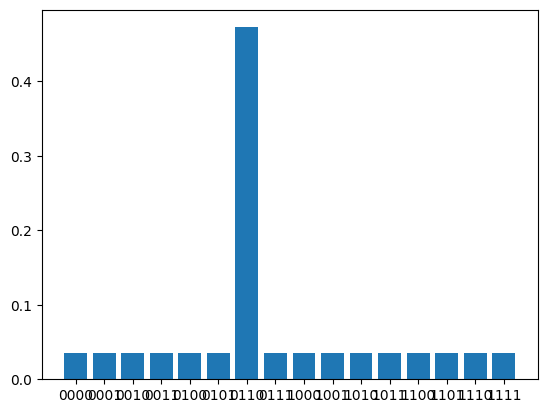

In [ ]:
from qiskit.circuit.library import GroverOperator

number = 4
grover = QuantumCircuit(number)
grover.h(range(number))
mark_state = Statevector.from_label('0110')
display(mark_state.draw('latex'))
grover_op = GroverOperator(mark_state, insert_barriers=True)
grover.append(grover_op, range(number))
visualization(grover.decompose().decompose())

<IPython.core.display.Latex object>

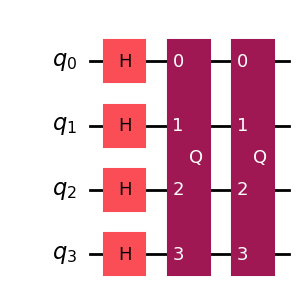

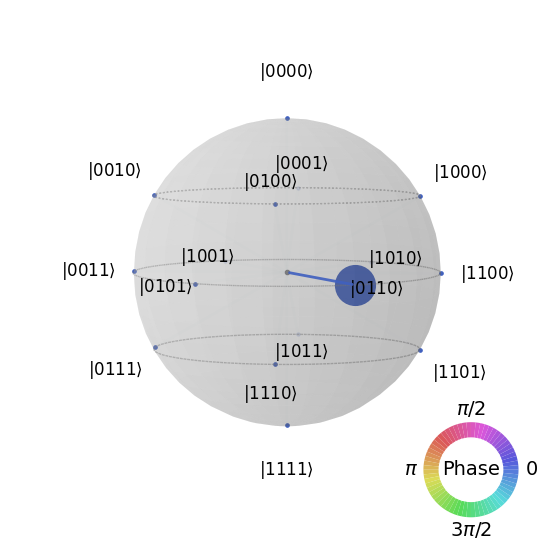

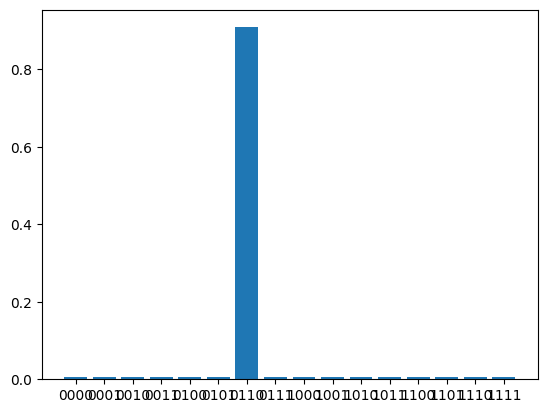

In [ ]:
grover.append(grover_op, range(number))
visualization(grover)

In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.0 MB/s eta 0:00:00


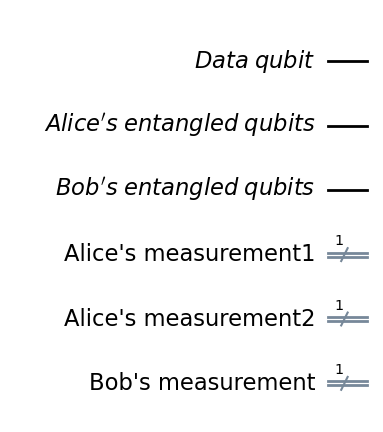

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import random_unitary
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

U = random_unitary(2)
Ugate = U.to_instruction()
UdaggerGate = U.adjoint().to_instruction()

dataQ = QuantumRegister(1, 'Data qubit')
aliceQ = QuantumRegister(1, "Alice's entangled qubits")
bobQ = QuantumRegister(1, "Bob's entangled qubits")
aliceC1 = ClassicalRegister(1, "Alice's measurement1")
aliceC2 = ClassicalRegister(1, "Alice's measurement2")
bobC = ClassicalRegister(1, "Bob's measurement")

qc = QuantumCircuit(dataQ, aliceQ, bobQ, aliceC1, aliceC2, bobC)
qc.draw('mpl')

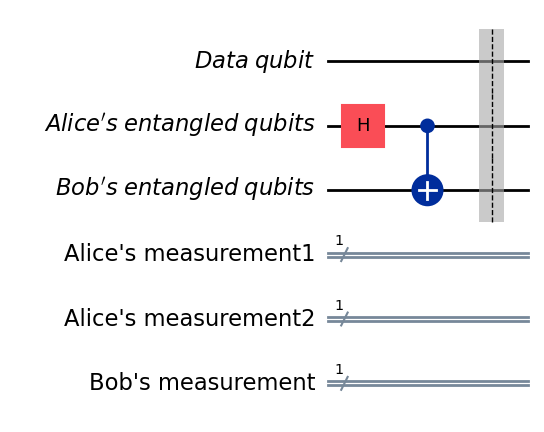

In [ ]:
qc.h(aliceQ[0])
qc.cx(aliceQ[0], bobQ[0])
qc.barrier()
qc.draw('mpl')

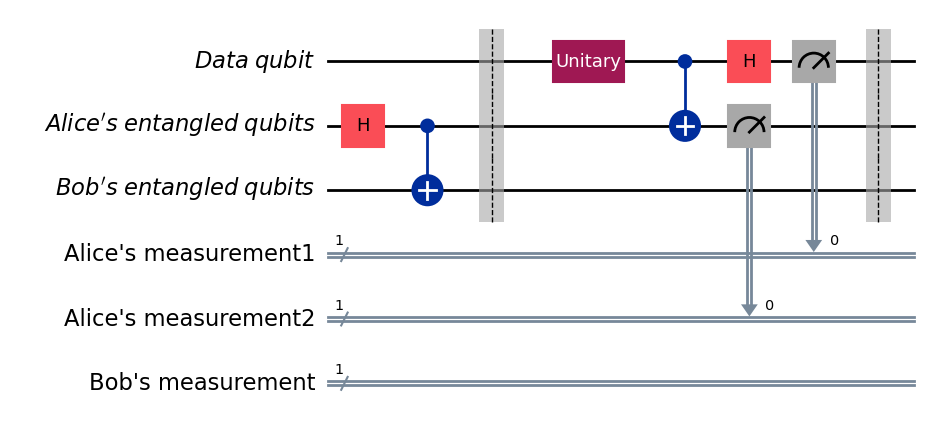

In [ ]:
qc.append(Ugate, [dataQ[0]])
qc.cx(dataQ[0], aliceQ[0])
qc.h(dataQ[0])
qc.measure(dataQ[0], aliceC1[0])
qc.measure(aliceQ[0], aliceC2[0])
qc.barrier()
qc.draw('mpl')

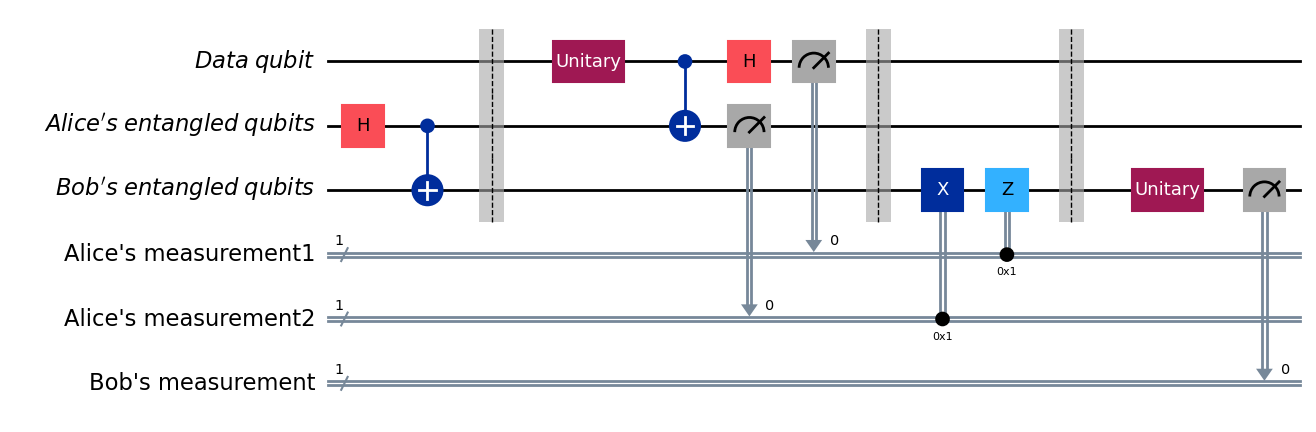

In [ ]:
qc.x(bobQ[0]).c_if(aliceC2, 1)
qc.z(bobQ[0]).c_if(aliceC1, 1)
qc.barrier()
qc.append(UdaggerGate, [bobQ[0]])
qc.measure(bobQ[0], bobC[0])
qc.draw('mpl')

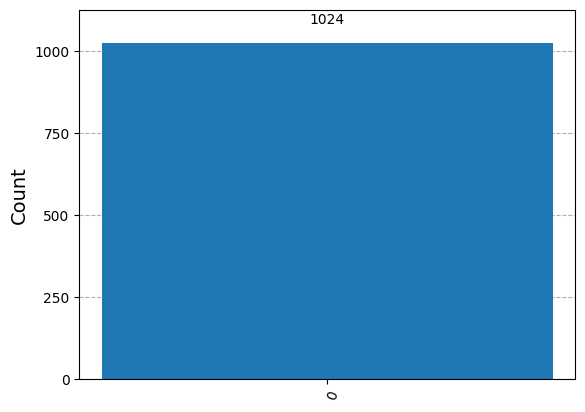

In [ ]:
from qiskit.result import marginal_counts

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
counts = result.get_counts()
marginal_result = marginal_counts(counts, indices=[2])
plot_histogram(marginal_result)